In [2]:
import pandas as pd

In [3]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)
sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [17]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n %s' % eigen_vals)


Eigenvalues 
 [ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


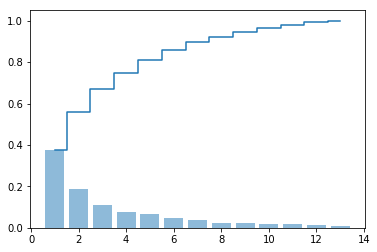

In [20]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14),var_exp,alpha = 0.5,align='center')
plt.step(range(1,14),cum_var_exp,where='mid')
plt.show()